In [1]:
import os
import sys
import numpy as np

from tensorflow import keras

module_path = os.path.abspath(os.path.join('..', '..', '..'))

if module_path not in sys.path:
    sys.path.append(os.path.join(module_path))

from functions.augmentation import get_augmentation_layers
from functions.class_weights import calculate_class_weight
from functions.loading_data import load_dataset
from functions.model_running import get_run_number, run_model
from models.efficientnet_v2 import get_v2s_model

In [2]:
WIDTH = 150
HEIGHT = 150
ROOT = os.path.join('..', '..', '..', '..')
DS_NAME = 'data1'
DATA_DIR = os.path.join(
    ROOT,
    '..',
    DS_NAME,
    'images_original_inception_resnet_v2_150x150_categorized')
MODEL_NAME_BASE = 'efficientnet_v2_11_v2s_class_weights_and_bias'

In [3]:
train_ds_dir = os.path.join(DATA_DIR, 'training')
class_dirs = [
    os.path.join(train_ds_dir, class_dir)
    for class_dir in os.listdir(train_ds_dir)
    if os.path.isdir(os.path.join(train_ds_dir, class_dir))]
class_counts = [len(os.listdir(class_dir)) for class_dir in class_dirs]
total_samples = np.sum(class_counts)
initial_biases = np.log(class_counts / (total_samples - class_counts))

In [4]:
BATCH_SIZE = 32
# dataset = load_dataset(HEIGHT, WIDTH, DATA_DIR, 'training', BATCH_SIZE)
# class_weight = calculate_class_weight(dataset, .6)
class_weight = {
    0: 4.528537585685208,
    1: 3.892096468068666,
    2: 3.300900528086318,
    3: 7.75870685219699,
    4: 3.29447516332762,
    5: 2.8658300243916535,
    6: 6.797989842280895}

In [5]:
METRICS = [
    keras.metrics.CategoricalCrossentropy(name='categorical cross entropy'),
    keras.metrics.MeanSquaredError(name='mean squared error'),
    keras.metrics.CategoricalAccuracy(name='accuracy'),
    keras.metrics.AUC(name='auc', multi_label=True),
    keras.metrics.AUC(name='prc', curve='PR', multi_label=True)
]

Found 8015 files belonging to 7 classes.
Found 2000 files belonging to 7 classes.
Epoch 1/100
251/251 [==============================] - ETA: 0s - loss: 4.4464 - categorical cross entropy: 1.2023 - mean squared error: 0.0659 - accuracy: 0.6676 - auc: 0.7858 - prc: 0.2813

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\efficientnet_v2_11_v2s_class_weights_and_bias_20_1\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\efficientnet_v2_11_v2s_class_weights_and_bias_20_1\assets


251/251 [==============================] - 154s 525ms/step - loss: 4.4464 - categorical cross entropy: 1.2023 - mean squared error: 0.0659 - accuracy: 0.6676 - auc: 0.7858 - prc: 0.2813 - val_loss: 0.8120 - val_categorical cross entropy: 0.8120 - val_mean squared error: 0.0541 - val_accuracy: 0.6955 - val_auc: 0.8800 - val_prc: 0.4518 - lr: 0.0010
Epoch 2/100
251/251 [==============================] - ETA: 0s - loss: 2.9664 - categorical cross entropy: 0.8138 - mean squared error: 0.0558 - accuracy: 0.7123 - auc: 0.8639 - prc: 0.3977

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\efficientnet_v2_11_v2s_class_weights_and_bias_20_2\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\efficientnet_v2_11_v2s_class_weights_and_bias_20_2\assets


251/251 [==============================] - 131s 522ms/step - loss: 2.9664 - categorical cross entropy: 0.8138 - mean squared error: 0.0558 - accuracy: 0.7123 - auc: 0.8639 - prc: 0.3977 - val_loss: 0.7468 - val_categorical cross entropy: 0.7468 - val_mean squared error: 0.0516 - val_accuracy: 0.7265 - val_auc: 0.8730 - val_prc: 0.4483 - lr: 0.0010
Epoch 3/100
251/251 [==============================] - ETA: 0s - loss: 2.6990 - categorical cross entropy: 0.7490 - mean squared error: 0.0525 - accuracy: 0.7304 - auc: 0.8909 - prc: 0.4560

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\efficientnet_v2_11_v2s_class_weights_and_bias_20_3\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\efficientnet_v2_11_v2s_class_weights_and_bias_20_3\assets


251/251 [==============================] - 131s 523ms/step - loss: 2.6990 - categorical cross entropy: 0.7490 - mean squared error: 0.0525 - accuracy: 0.7304 - auc: 0.8909 - prc: 0.4560 - val_loss: 0.6990 - val_categorical cross entropy: 0.6990 - val_mean squared error: 0.0484 - val_accuracy: 0.7570 - val_auc: 0.9267 - val_prc: 0.5750 - lr: 0.0010
Epoch 4/100
251/251 [==============================] - ETA: 0s - loss: 2.5892 - categorical cross entropy: 0.7229 - mean squared error: 0.0504 - accuracy: 0.7419 - auc: 0.9025 - prc: 0.4973

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\efficientnet_v2_11_v2s_class_weights_and_bias_20_4\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\efficientnet_v2_11_v2s_class_weights_and_bias_20_4\assets


251/251 [==============================] - 134s 535ms/step - loss: 2.5892 - categorical cross entropy: 0.7229 - mean squared error: 0.0504 - accuracy: 0.7419 - auc: 0.9025 - prc: 0.4973 - val_loss: 0.6531 - val_categorical cross entropy: 0.6531 - val_mean squared error: 0.0459 - val_accuracy: 0.7665 - val_auc: 0.9284 - val_prc: 0.6222 - lr: 0.0010
Epoch 5/100
251/251 [==============================] - 68s 268ms/step - loss: 2.5955 - categorical cross entropy: 0.7192 - mean squared error: 0.0499 - accuracy: 0.7425 - auc: 0.9020 - prc: 0.5121 - val_loss: 0.7211 - val_categorical cross entropy: 0.7211 - val_mean squared error: 0.0490 - val_accuracy: 0.7620 - val_auc: 0.9097 - val_prc: 0.5811 - lr: 0.0010
Epoch 6/100
251/251 [==============================] - 67s 268ms/step - loss: 2.5287 - categorical cross entropy: 0.7081 - mean squared error: 0.0492 - accuracy: 0.7508 - auc: 0.9072 - prc: 0.5202 - val_loss: 0.6536 - val_categorical cross entropy: 0.6536 - val_mean squared error: 0.0458 

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\efficientnet_v2_11_v2s_class_weights_and_bias_20_7\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\efficientnet_v2_11_v2s_class_weights_and_bias_20_7\assets


251/251 [==============================] - 135s 538ms/step - loss: 2.3931 - categorical cross entropy: 0.6729 - mean squared error: 0.0473 - accuracy: 0.7612 - auc: 0.9143 - prc: 0.5604 - val_loss: 0.6515 - val_categorical cross entropy: 0.6515 - val_mean squared error: 0.0451 - val_accuracy: 0.7625 - val_auc: 0.9249 - val_prc: 0.6460 - lr: 0.0010
Epoch 8/100
251/251 [==============================] - ETA: 0s - loss: 2.2288 - categorical cross entropy: 0.6354 - mean squared error: 0.0454 - accuracy: 0.7724 - auc: 0.9284 - prc: 0.6039

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\efficientnet_v2_11_v2s_class_weights_and_bias_20_8\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\efficientnet_v2_11_v2s_class_weights_and_bias_20_8\assets


251/251 [==============================] - 137s 543ms/step - loss: 2.2288 - categorical cross entropy: 0.6354 - mean squared error: 0.0454 - accuracy: 0.7724 - auc: 0.9284 - prc: 0.6039 - val_loss: 0.5857 - val_categorical cross entropy: 0.5857 - val_mean squared error: 0.0413 - val_accuracy: 0.8075 - val_auc: 0.9347 - val_prc: 0.6902 - lr: 0.0010
Epoch 9/100
251/251 [==============================] - 70s 275ms/step - loss: 2.2930 - categorical cross entropy: 0.6491 - mean squared error: 0.0458 - accuracy: 0.7668 - auc: 0.9209 - prc: 0.6054 - val_loss: 0.6401 - val_categorical cross entropy: 0.6401 - val_mean squared error: 0.0435 - val_accuracy: 0.7875 - val_auc: 0.9138 - val_prc: 0.5726 - lr: 0.0010
Epoch 10/100
251/251 [==============================] - 69s 276ms/step - loss: 2.8254 - categorical cross entropy: 0.7861 - mean squared error: 0.0534 - accuracy: 0.7337 - auc: 0.8795 - prc: 0.4681 - val_loss: 0.7061 - val_categorical cross entropy: 0.7061 - val_mean squared error: 0.0503

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\efficientnet_v2_11_v2s_class_weights_and_bias_20_20\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\efficientnet_v2_11_v2s_class_weights_and_bias_20_20\assets


251/251 [==============================] - 131s 522ms/step - loss: 2.0208 - categorical cross entropy: 0.5806 - mean squared error: 0.0417 - accuracy: 0.7913 - auc: 0.9395 - prc: 0.6643 - val_loss: 0.5843 - val_categorical cross entropy: 0.5843 - val_mean squared error: 0.0410 - val_accuracy: 0.7960 - val_auc: 0.9238 - val_prc: 0.6834 - lr: 9.5000e-04
Epoch 21/100
251/251 [==============================] - 71s 280ms/step - loss: 2.1826 - categorical cross entropy: 0.6181 - mean squared error: 0.0438 - accuracy: 0.7765 - auc: 0.9293 - prc: 0.6448 - val_loss: 1.2635 - val_categorical cross entropy: 1.2635 - val_mean squared error: 0.0641 - val_accuracy: 0.7040 - val_auc: 0.8480 - val_prc: 0.4657 - lr: 9.5000e-04
Epoch 22/100
251/251 [==============================] - 71s 283ms/step - loss: 2.7306 - categorical cross entropy: 0.7646 - mean squared error: 0.0519 - accuracy: 0.7416 - auc: 0.8874 - prc: 0.5038 - val_loss: 0.7150 - val_categorical cross entropy: 0.7150 - val_mean squared erro

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\efficientnet_v2_11_v2s_class_weights_and_bias_20_33\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\efficientnet_v2_11_v2s_class_weights_and_bias_20_33\assets


251/251 [==============================] - 140s 558ms/step - loss: 1.8009 - categorical cross entropy: 0.5208 - mean squared error: 0.0377 - accuracy: 0.8092 - auc: 0.9508 - prc: 0.7381 - val_loss: 0.5537 - val_categorical cross entropy: 0.5537 - val_mean squared error: 0.0383 - val_accuracy: 0.8085 - val_auc: 0.9304 - val_prc: 0.7071 - lr: 9.0250e-04
Epoch 34/100
251/251 [==============================] - 74s 291ms/step - loss: 1.8115 - categorical cross entropy: 0.5257 - mean squared error: 0.0382 - accuracy: 0.8105 - auc: 0.9523 - prc: 0.7299 - val_loss: 0.6586 - val_categorical cross entropy: 0.6586 - val_mean squared error: 0.0432 - val_accuracy: 0.7875 - val_auc: 0.9083 - val_prc: 0.6652 - lr: 9.0250e-04
Epoch 35/100
251/251 [==============================] - 73s 291ms/step - loss: 1.7610 - categorical cross entropy: 0.5107 - mean squared error: 0.0372 - accuracy: 0.8201 - auc: 0.9528 - prc: 0.7490 - val_loss: 0.7062 - val_categorical cross entropy: 0.7062 - val_mean squared erro

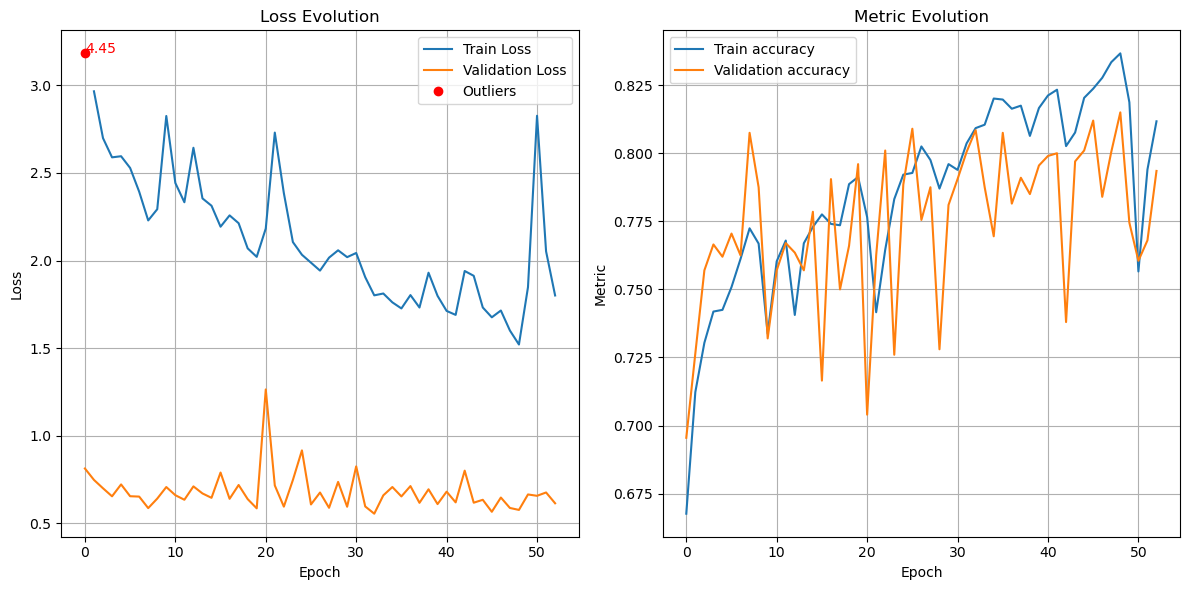

(<keras.engine.functional.Functional at 0x1ca3463dee0>,
 <keras.callbacks.History at 0x1c7e7fbe970>)

In [6]:
run_model(
    ROOT,
    HEIGHT,
    WIDTH,
    DATA_DIR,
    DS_NAME,
    MODEL_NAME_BASE,
    lambda num_classes:
        lambda: get_v2s_model(
            HEIGHT,
            WIDTH,
            num_classes,
            metrics=METRICS,
            biases=keras.initializers.Constant(initial_biases)),
    get_augmentation_layers,
    batch_size=BATCH_SIZE,
    class_weight=class_weight,
    stopping_patience=20)